In [109]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [31]:
air_data = pd.read_csv("./air_quality.csv")

In [113]:
air_data.head()

,CO,NMHC
0,1.360,1.046
1,1.292,0.955
2,1.402,0.939
3,1.376,0.948
4,1.272,0.836


In [45]:
plotrange = [[min(air_data.CO),max(air_data.CO)],[min(air_data.NMHC), max(air_data.NMHC)]]

In [46]:
plotrange

[[0.647, 2.04], [0.38299999999999995, 2.214]]

In [82]:
matrix, xedges, yedges = np.histogram2d(x = air_data.CO, y = air_data.NMHC, 
                                        bins = 4, density = True, range = plotrange)

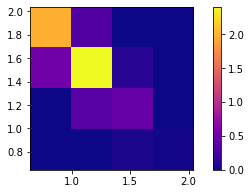

In [99]:
fig = plt.figure(figsize = (7,3))
plt.imshow(matrix, extent = [xedges[0], xedges[-1], xedges[0], xedges[-1]], cmap = 'plasma')
plt.colorbar()

In [85]:
first_50 = air_data[:50]

Text(0.5, 1.0, 'whole data with 0.05 bandwidth')

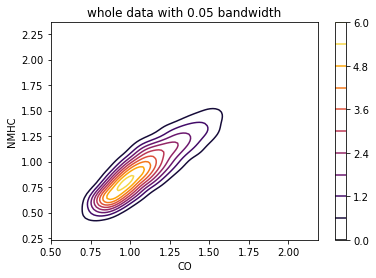

In [107]:
ax = sb.kdeplot(air_data.CO, air_data.NMHC, bw = 0.05, cbar = True, fill = True, cmap = "inferno")
ax.set_title("whole data with 0.05 bandwidth")

Text(0.5, 1.0, 'first 50 data with 0.05 bandwidth')

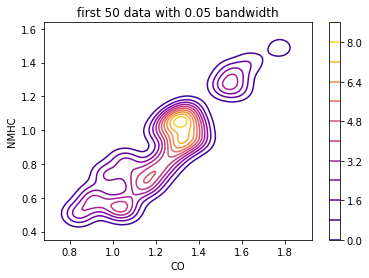

In [108]:
ax = sb.kdeplot(first_50.CO, first_50.NMHC, bw = 0.05, cbar = True, cmap = "plasma")
ax.set_title("first 50 data with 0.05 bandwidth")

In [111]:
kde = KernelDensity(bandwidth = 0.05).fit(air_data)

In [138]:
co_ax = np.arange(0.5,2.01,0.01)
len(co_ax)

151

In [119]:
margin_pdf = np.zeros(len(co_ax))
for i in range(len(co_ax)):
    nm_col = np.arange(0.2, 2, 0.01)
    co_col = np.array([co_ax[i]] * len(nm_col))
    input_arr = np.vstack((co_col, nm_col))
    margin_pdf[i] = np.sum(np.exp(kde.score_samples(input_arr.T)) * 0.01)

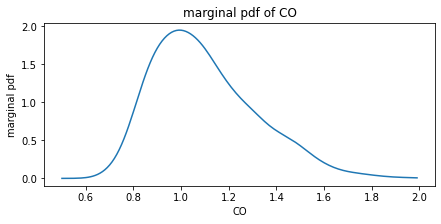

In [121]:
plt.figure(figsize = (7,3))
plt.plot(co_ax, margin_pdf)
plt.title("marginal pdf of CO")
plt.xlabel("CO")
plt.ylabel("marginal pdf")
plt.show()

In [139]:
co_ax[30]

0.8000000000000003

In [145]:
np.array([[0.1],[0.1]]).T.shape

(1, 2)

In [146]:
nm_ax = np.arange(0.2, 2, 0.01)
cond_pdf = np.zeros(len(nm_ax))
nm_col = np.arange(0.5,2.01,0.01)
co_col = np.array([0.8]*len(nm_col))
input_arr = np.vstack((co_col, nm_col))
margin_pdf_sum = np.sum(np.exp(kde.score_samples(input_arr.T)) * 0.01)
for i in range(len(nm_ax)):
    cond_pdf[i] = np.sum(np.exp(kde.score_samples(
        np.array([[0.8],[nm_ax[i]]]).T)))/margin_pdf_sum

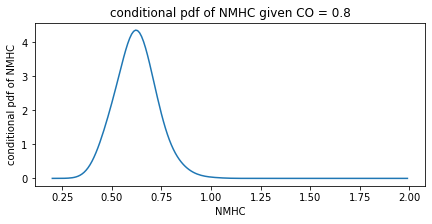

In [147]:
plt.figure(figsize = (7,3))
plt.plot(nm_ax, cond_pdf)
plt.title("conditional pdf of NMHC given CO = 0.8")
plt.xlabel("NMHC")
plt.ylabel("conditional pdf of NMHC")
plt.show()